In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)
from scipy import stats

In [91]:
# parametry ulohy
K = 27
L = len("Bardatskii")  # 10
M = ((K + L) * 47) % 11 + 1
M

2

Náš dataset tedy je:

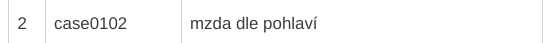

# 1. Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení

Dataset jsme již stáhli, jenom ho teď načteme:

In [92]:
df_data = pd.read_csv('case0102.csv')

In [93]:
display(df_data.head())
display(df_data.tail())

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female


,Salary,Sex
88,6600,Male
89,6840,Male
90,6900,Male
91,6900,Male
92,8100,Male


Vidíme, že data reprezentují skutečně mzdu dle pohlaví - ženy a muži. Tj. máme dvě hlavní skupiny - Female a Male, které budeme analyzovat.

Rozdělíme data na dvě pozorované skupiny:

In [94]:
df_female = df_data[df_data['Sex'] == 'Female']
df_female.head()

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female


In [95]:
df_male = df_data[df_data['Sex'] == 'Male']
df_male.head()

,Salary,Sex
61,4620,Male
62,5040,Male
63,5100,Male
64,5100,Male
65,5220,Male


In [96]:
male_sal = df_male['Salary']
male_sal.head()

61    4620
62    5040
63    5100
64    5100
65    5220
Name: Salary, dtype: int64

In [97]:
female_sal = df_female['Salary']
female_sal.head()

0    3900
1    4020
2    4290
3    4380
4    4380
Name: Salary, dtype: int64

## Popis dat a zkoumaného problému

- Data z experimentu, kde se zkoumal rozdíl v počatečních mzdách mezi muži a ženami.

- Dataset obsahuje 93 pozorování o mzdách mužů a žen.
- Informace o platu 61 žen a 32 mužů.


## Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

### Výběrová střední hodnota

In [98]:
print(f"Male výběrová střední hodnota: {np.mean(male_sal):.2f}")
print(f"Female výběrová střední hodnota: {np.mean(female_sal):.2f}")

Male výběrová střední hodnota: 5956.88
Female výběrová střední hodnota: 5138.85


### Výběrový rozptyl

In [99]:
print(f'Male výběrový rozptyl: {male_sal.var():.2f}')
print(f'Female výběrový rozptyl: {female_sal.var():.2f}')

Male výběrový rozptyl: 477112.50
Female výběrový rozptyl: 291460.33


### Medián

In [100]:
print(f'Male medián: {np.median(male_sal):.2f}')
print(f'Female medián: {np.median(female_sal):.2f}')

Male medián: 6000.00
Female medián: 5220.00


# 2. Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

## Odhad hustoty pomoci histogramu

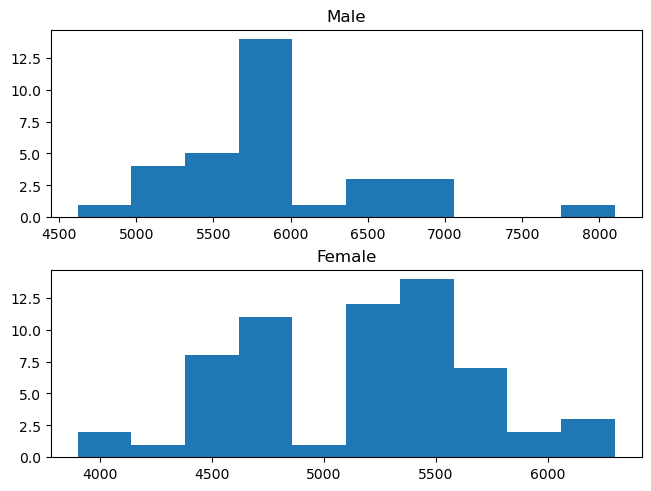

In [101]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10)
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10)
ax2.set_title("Female")

fig.show()

## Odhad hustoty pomoci histogramu s normalizací

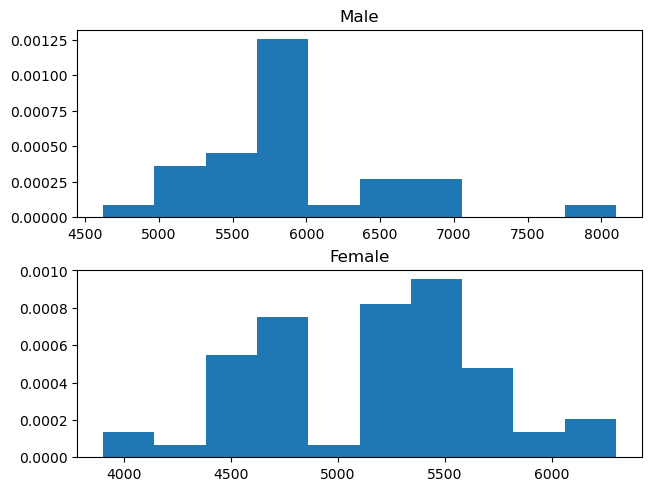

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10, density=True)
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10, density=True)
ax2.set_title("Female")

fig.show()

## Odhad distribuční funkce pomoci histogramu a odhad empirické distribuční funkce

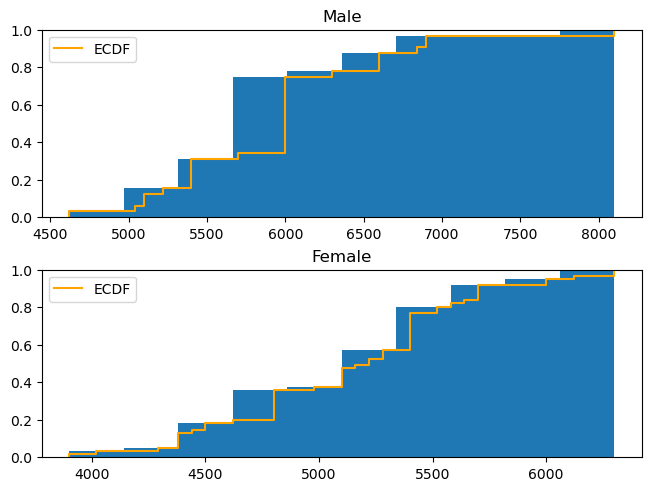

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10, density=True, cumulative=True)
ax1.ecdf(x=male_sal, color='orange',label = 'ECDF')
ax1.set_title("Male")
ax1.legend(loc='upper left')


ax2.hist(x=female_sal, bins=10, density=True, cumulative=True)
ax2.ecdf(x=female_sal, color='orange', label='ECDF')
ax2.set_title("Female")
ax2.legend(loc='upper left')

fig.show()

# 3. Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

## Normální rozdělení pro muže a ženy

In [104]:
m_norm_mean_hat, m_norm_std_dev_hat = stats.norm.fit(male_sal)
print(f'Male: odhad střední hodnoty - {m_norm_mean_hat:.2f}, odhad směrodatné odchylky - {m_norm_std_dev_hat:.2f}')

f_norm_mean_hat, f_norm_std_dev_hat = stats.norm.fit(female_sal)
print(f'Female: odhad střední hodnoty - {f_norm_mean_hat:.2f}, odhad směrodatné odchylky - {f_norm_std_dev_hat:.2f}')

Male: odhad střední hodnoty - 5956.88, odhad směrodatné odchylky - 679.85
Female: odhad střední hodnoty - 5138.85, odhad směrodatné odchylky - 535.43


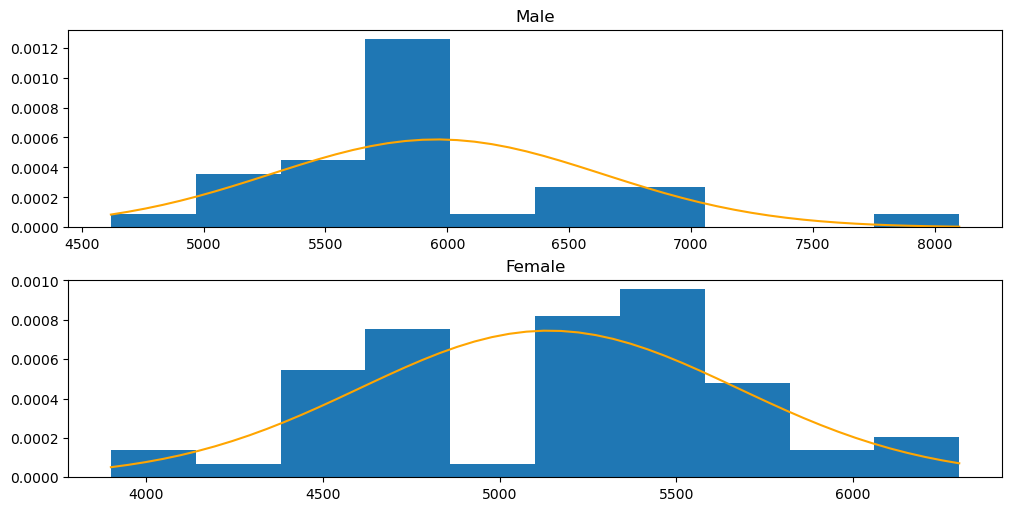

In [105]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.norm.pdf(x=m_x_values, loc=m_norm_mean_hat, scale=m_norm_std_dev_hat),
    color="orange",
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.norm.pdf(x=f_x_values, loc=f_norm_mean_hat, scale=f_norm_std_dev_hat),
    color="orange",
)
ax2.set_title("Female")

fig.show()

## Exponenciální rozdělení pro muže a ženy

In [106]:
m_expon_loc_hat, m_expon_scale_hat = stats.expon.fit(male_sal)
print(f'Male: location - {m_expon_loc_hat:.2f}, scale - {m_expon_scale_hat:.2f}')

f_expon_loc_hat, f_expon_scale_hat = stats.expon.fit(female_sal)
print(f'Female: location - {f_expon_loc_hat:.2f}, scale - {f_expon_scale_hat:.2f}')

Male: location - 4620.00, scale - 1336.88
Female: location - 3900.00, scale - 1238.85


Parametr location (loc) jenom reguluje posunutí grafu. Parametr scale pro nás ale je zajímavý, protože scale - 1 / lambda, kde lambda je parametr rate exponenciálního rozdělení. 

In [107]:
m_lambda_hat = 1 / m_expon_scale_hat
f_lambda_hat = 1 / f_expon_scale_hat

print(f'Male: odhad rate parametru - {m_lambda_hat:.5f}')
print(f'Female: odhad rate parametru - {f_lambda_hat:.5f}')

Male: odhad rate parametru - 0.00075
Female: odhad rate parametru - 0.00081


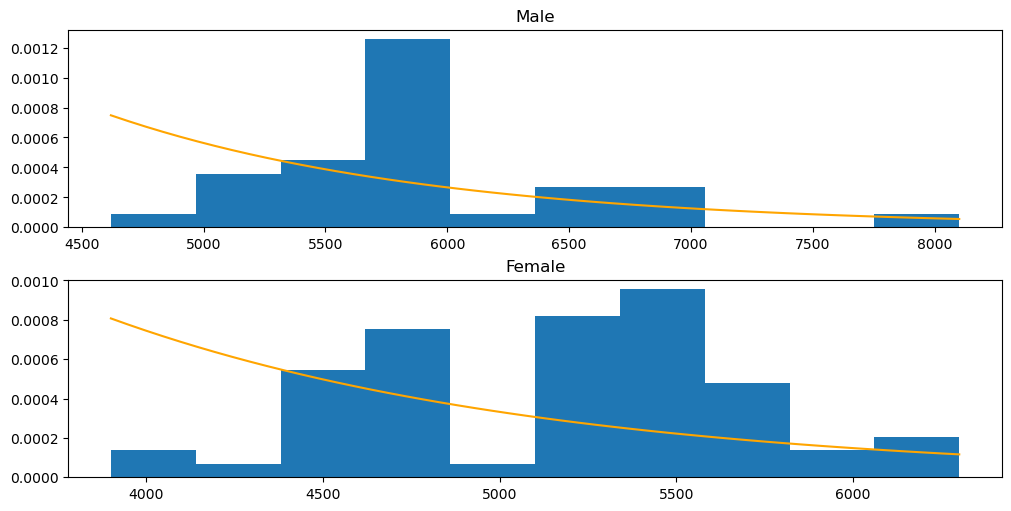

In [108]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.expon.pdf(x=m_x_values, loc=m_expon_loc_hat, scale=m_expon_scale_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.expon.pdf(x=f_x_values, loc=f_expon_loc_hat, scale=f_expon_scale_hat),
    color="orange"
)
ax2.set_title("Female")

fig.show()

## Uniformní rozdělení pro muže a ženy

In [109]:
m_uniform_a_hat, m_uniform_b_hat = stats.uniform.fit(male_sal)
print(
    f"Male: odhad parametru a - {m_uniform_a_hat:.2f}, odhad parametru b - {m_uniform_b_hat:.2f}"
)

f_uniform_a_hat, f_uniform_b_hat = stats.uniform.fit(female_sal)
print(
    f"Female: odhad parametru a - {f_uniform_a_hat:.2f}, odhad parametru b -  {f_uniform_b_hat:.2f}"
)

Male: odhad parametru a - 4620.00, odhad parametru b - 3480.00
Female: odhad parametru a - 3900.00, odhad parametru b -  2400.00


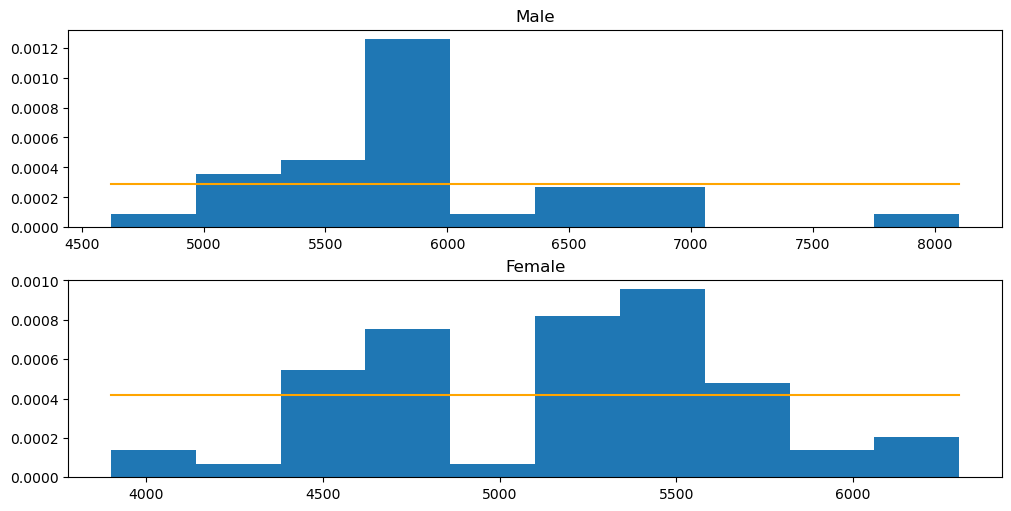

In [110]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.uniform.pdf(x=m_x_values, loc=m_uniform_a_hat, scale=m_uniform_b_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.uniform.pdf(x=f_x_values, loc=f_uniform_a_hat, scale=f_uniform_b_hat),
    color="orange"
)
ax2.set_title("Female")

fig.show()

## Na základě grafů jsme odhadli, že se jedná o normální rozdělení. Navíc hodnoty parametrů odhadnutých pro normální rozdělení jsou nejblíže hodnotám střední hodnoty z první úlohy.  

# 4. Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

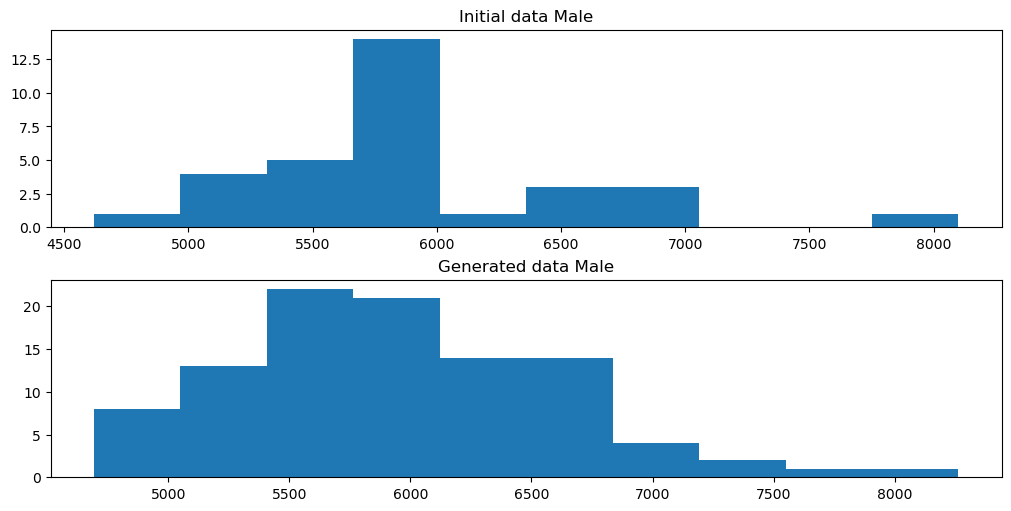

In [128]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
m_x_simulated = stats.norm.rvs(loc=m_norm_mean_hat, scale=m_norm_std_dev_hat, size=100)
ax1.hist(male_sal, bins=10)
ax1.set_title("Initial data Male")
ax2.hist(m_x_simulated, bins=10)
ax2.set_title("Generated data Male")

fig.show()

Hustoty vizualizovane pomoci histogramů jsou podobné. 

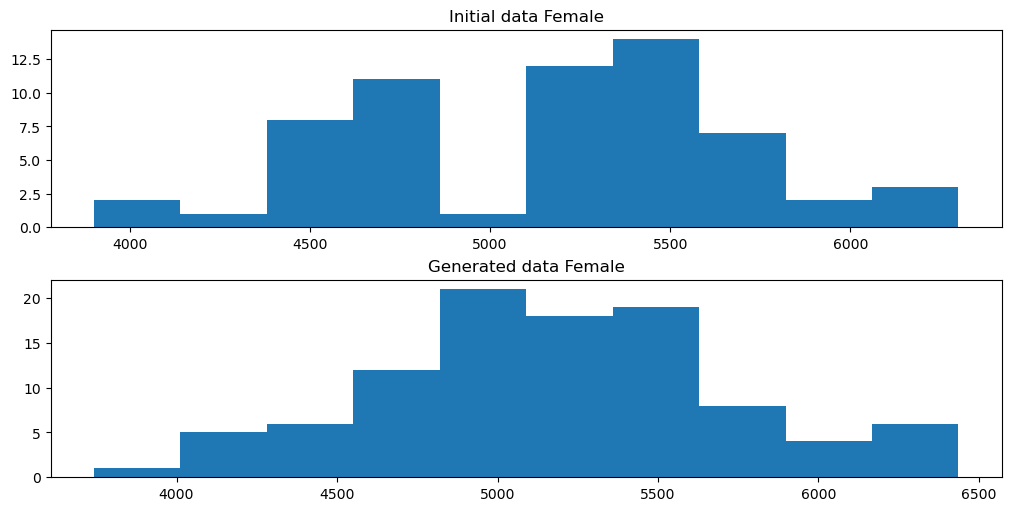

In [112]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
f_x_simulated = stats.norm.rvs(loc=f_norm_mean_hat, scale=f_norm_std_dev_hat, size=100)
ax1.hist(female_sal, bins=10)
ax1.set_title("Initial data Female")
ax2.hist(f_x_simulated, bins=10)
ax2.set_title("Generated data Female")

fig.show()

Hustoty vizualizovane pomoci histogramů jsou podobné. 

# 5. Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [113]:
# Pro zeny
confidence_interval_female = stats.t.interval(0.95, len(female_sal) - 1, loc=np.mean(female_sal), scale=stats.sem(female_sal))

lower_bound_f, upper_bound_f = confidence_interval_female

confidence_interval_male = stats.t.interval(0.95, len(male_sal) - 1, loc=np.mean(male_sal), scale=stats.sem(male_sal))

lower_bound_m, upper_bound_m = confidence_interval_male

print(f'Oboustranný 95% konfidenční interval mužů ({lower_bound_m:.2f},{upper_bound_m:.2f}) pro střední hodnotu.')
print(f'Oboustranný 95% konfidenční interval žen ({lower_bound_f:.2f},{upper_bound_f:.2f}) pro střední hodnotu.')

Oboustranný 95% konfidenční interval mužů (5707.84,6205.91) pro střední hodnotu.
Oboustranný 95% konfidenční interval žen (5000.59,5277.12) pro střední hodnotu.


# 6. Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

## Pro ženy

In [114]:
K = 27
refuse = False
if K >= confidence_interval_female[0] and K <= confidence_interval_female[1]:
    refuse = False
else:
    refuse = True

if refuse:
    print(f'Nulovou hypotézu pro skupinu Female, že střední hodnota je rovná hodnotě {K}, na hladině významnosti 5% zamítáme. {K} neleží v ({lower_bound_f:.2f},{upper_bound_f:.2f}). Alternativní hypotéza o tom, že střední hodnota není rovna hodnotě {K} je statistický významná.')
else:
    print(f'Nulovou hypotézu pro skupinu Female, že střední hodnota je rovná hodnotě {K}, na hladině významnosti 5% nezamítáme. {K} leží v ({lower_bound_f:.2f},{upper_bound_f:.2f}). Alternativní hypotéza o tom, že střední hodnota není rovna hodnotě {K} je statistkcý nevýznamná')

Nulovou hypotézu pro skupinu Female, že střední hodnota je rovná hodnotě 27, na hladině významnosti 5% zamítáme. 27 neleží v (5000.59,5277.12). Alternativní hypotéza o tom, že střední hodnota není rovna hodnotě 27 je statistický významná.


## Pro muzi

In [115]:
K = 27
refuse = False
if K >= confidence_interval_male[0] and K <= confidence_interval_male[1]:
    refuse = False
else:
    refuse = True

if refuse:
    print(f'Nulovou hypotézu pro skupinu Female, že střední hodnota je rovná hodnotě {K}, na hladině významnosti 5% zamítáme. {K} neleží v ({lower_bound_m:.2f},{upper_bound_m:.2f}). Alternativní hypotéza o tom, že střední hodnota není rovna hodnotě {K} je statistický významná.')
else:
    print(f'Nulovou hypotézu pro skupinu Female, že střední hodnota je rovná hodnotě {K}, na hladině významnosti 5% nezamítáme. {K} leží v ({lower_bound_m:.2f},{upper_bound_m:.2f}). Alternativní hypotéza o tom, že střední hodnota není rovna hodnotě {K} je statistkcý nevýznamná')

Nulovou hypotézu pro skupinu Female, že střední hodnota je rovná hodnotě 27, na hladině významnosti 5% zamítáme. 27 neleží v (5707.84,6205.91). Alternativní hypotéza o tom, že střední hodnota není rovna hodnotě 27 je statistický významná.


# 7. Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

Chceme na hladině vyznamnosti 5% otestovat hypotézu, střední hodnota $\mu_{m}$ skupiny Male je stejná jako střední hodnota $\mu_{f}$ skupiny Female: $$H_0: \mu_{m} = \mu_{f} $$

Problem ale je, že pracujeme s dvouvýběrocým testem pro náhodný výběr skupiny Male a náhodný výběr skupiny Female, které pocházeji z normálního rozdělení (jak jsme to určili/odhadli dříve). Výběrové rozptyly obou skupin se mohou lišit. Proto nejprve provedem test o shodě středních hodnot těchto dvou náhodných výběru - tzv. F-test:

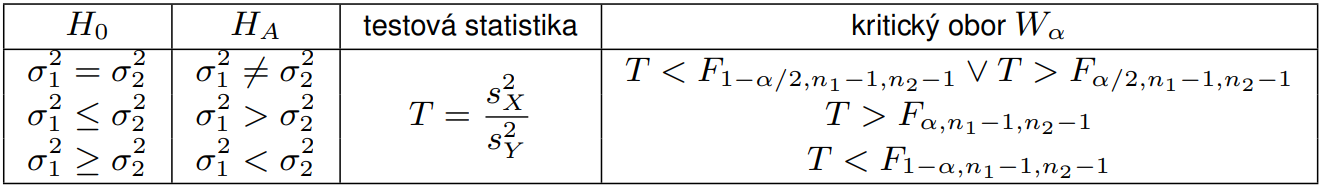

Konkrétě náz zajímá hypotéza: $$H_0: \sigma_{m}^{2} = \sigma_{f}^2$$ $$H_A: \sigma_{m}^{2} \neq \sigma_{f}^2$$

In [116]:
alpha = 0.05

In [117]:
m_var = np.var(male_sal, ddof=1)
f_var = np.var(female_sal, ddof=1)

print(f"Variance skupiny Male: {m_var:.2f}\nVariance skupiny Female: {f_var:.2f}")

Variance skupiny Male: 477112.50
Variance skupiny Female: 291460.33


In [118]:
t_statistics_var = m_var / f_var
print(f"Testovací statistika pro varianci: {t_statistics_var:.2f}")

Testovací statistika pro varianci: 1.64


In [119]:
m_n = len(male_sal)
f_n = len(female_sal)
print(f"Počet Male datových bodů: {m_n}\nPočet Female datových bodů: {f_n}")

Počet Male datových bodů: 32
Počet Female datových bodů: 61


In [120]:
f_upper_critical_val = stats.f.ppf(1 - alpha / 2, m_n - 1, f_n - 1)
f_lower_critical_val = stats.f.ppf(alpha / 2, m_n - 1, f_n - 1)

f_rejection_region = np.array([f_lower_critical_val, f_upper_critical_val])

print(
    f"Non-rejection region: [{f_lower_critical_val:.2f}, {f_upper_critical_val:.2f}]"
)

Non-rejection region: [0.52, 1.81]


Vidíme že kritický obor $W_\alpha = (-\infty, 0.52]\cup[1.81,+\infty)$ a jak vidíme, $T = 1.64 \notin W_\alpha$, tj. hypotézu o shodě rozptylů nemůžeme zamítnout.

Teď provedeme test o shodě středních hodnot:

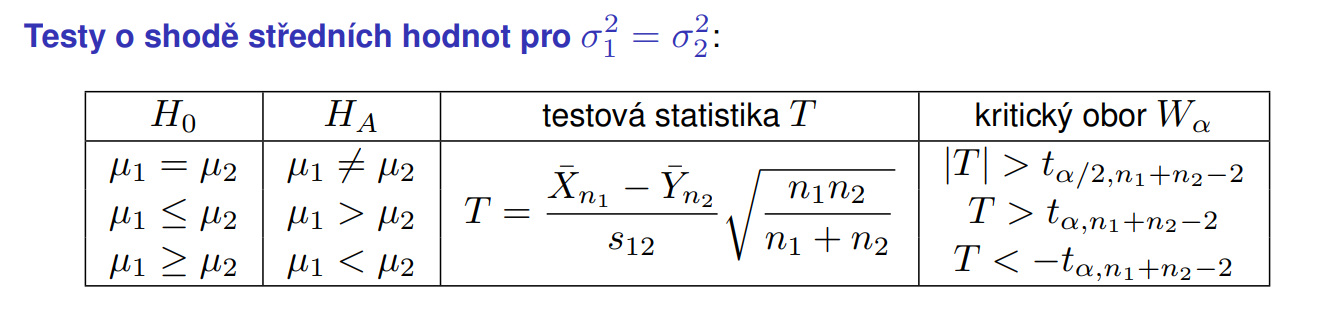

Konkrétně testujeme hypotézu: $$H_0: \mu_{m} = \mu_{f}$$ $$H_A: \mu_{m} \neq \mu_{f}$$

Spočítáme nejprve $s_{mf}$:

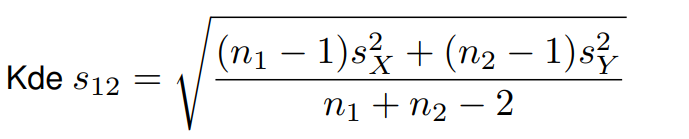

In [121]:
s_m_f = np.sqrt(((m_n - 1) * m_var + (f_n - 1) * f_var)/(m_n + f_n - 2))
print(f"{s_m_f:.2f}")

595.57


$s_{mf} \approx 595.57$

In [122]:
t_statistics_mean = ((np.mean(male_sal) - np.mean(female_sal)) / s_m_f) * np.sqrt(
    (m_n * f_n) / (m_n + f_n)
)
print(f"Testovací statistika pro střední hodnotu: {t_statistics_mean:.2f}")

Testovací statistika pro střední hodnotu: 6.29


In [123]:
lower_critical_val = stats.t.ppf(alpha / 2, m_n + f_n - 2)
upper_critical_val = -lower_critical_val
print(f"Kritické hodnoty: {lower_critical_val:.2f}, {upper_critical_val:.2f}")

Kritické hodnoty: -1.99, 1.99


Kritický obor je tedy: $W_\alpha = (-\infty, -1.99] \cup [1.99, +\infty) $
Vidíme, že $T \approx 6.29 \in W_\alpha$, tj. hypotézu o shodě středních hodnot zamítáme.